In [29]:
#import modules/libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from matplotlib.pyplot import figure

In [30]:
#read the csv file
iris = pd.read_csv('housing.csv')

In [31]:
#preview 1000 rows of the csv files
iris.head(1000)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
995,-121.75,37.71,11.0,12070.0,2220.0,5826.0,2125.0,4.8624,192400.0,INLAND
996,-121.77,37.74,25.0,494.0,81.0,254.0,85.0,9.1531,418800.0,INLAND
997,-121.80,37.70,22.0,5533.0,943.0,2474.0,910.0,4.7361,216800.0,INLAND
998,-121.80,37.69,17.0,3956.0,639.0,2222.0,662.0,5.4324,215500.0,INLAND


In [20]:
#select columns that will be used in the K-means method
x=iris.iloc[:,[0, 1]]

In [32]:
iris.iloc[:,[0, 1]]

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85
...,...,...
20635,-121.09,39.48
20636,-121.21,39.49
20637,-121.22,39.43
20638,-121.32,39.43


In [33]:
#convert the x data into array using numpy array
x  = np.array(x)
np.array(x)

array([[-122.23  ,   37.88  ,    8.3252],
       [-122.22  ,   37.86  ,    8.3014],
       [-122.24  ,   37.85  ,    7.2574],
       ...,
       [-121.22  ,   39.43  ,    1.7   ],
       [-121.32  ,   39.43  ,    1.8672],
       [-121.24  ,   39.37  ,    2.3886]])

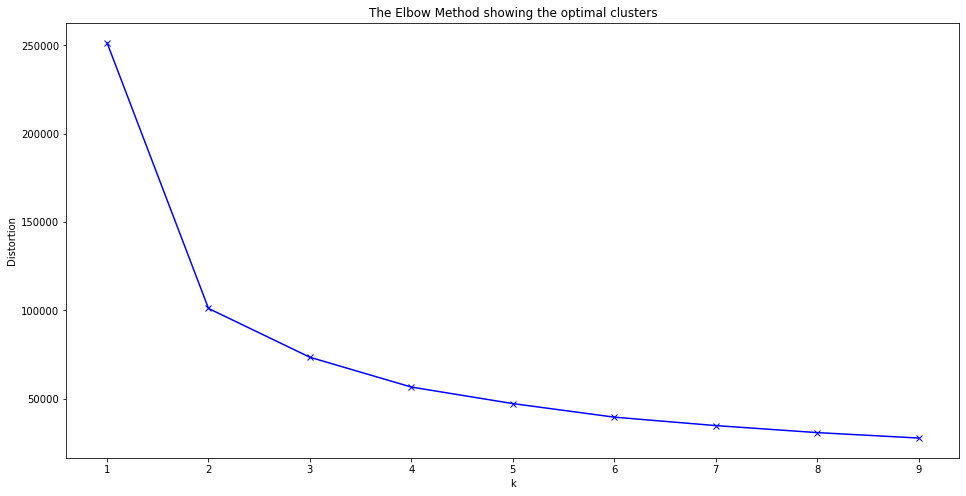

In [34]:
#Find the optimal number of clusters
#we can also make a quick analyze to find the optimal number (centers) of clusters using Elbow Method

# Collecting the distortions into list
distortions = []
K = range(1,10)
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(x)
 distortions.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

In [35]:
#Implement the K-Means

# Define the model
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [36]:
# Fit into our dataset fit
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, ..., 1, 1, 1])

In [37]:
iris['Cluster'] = identified_clusters

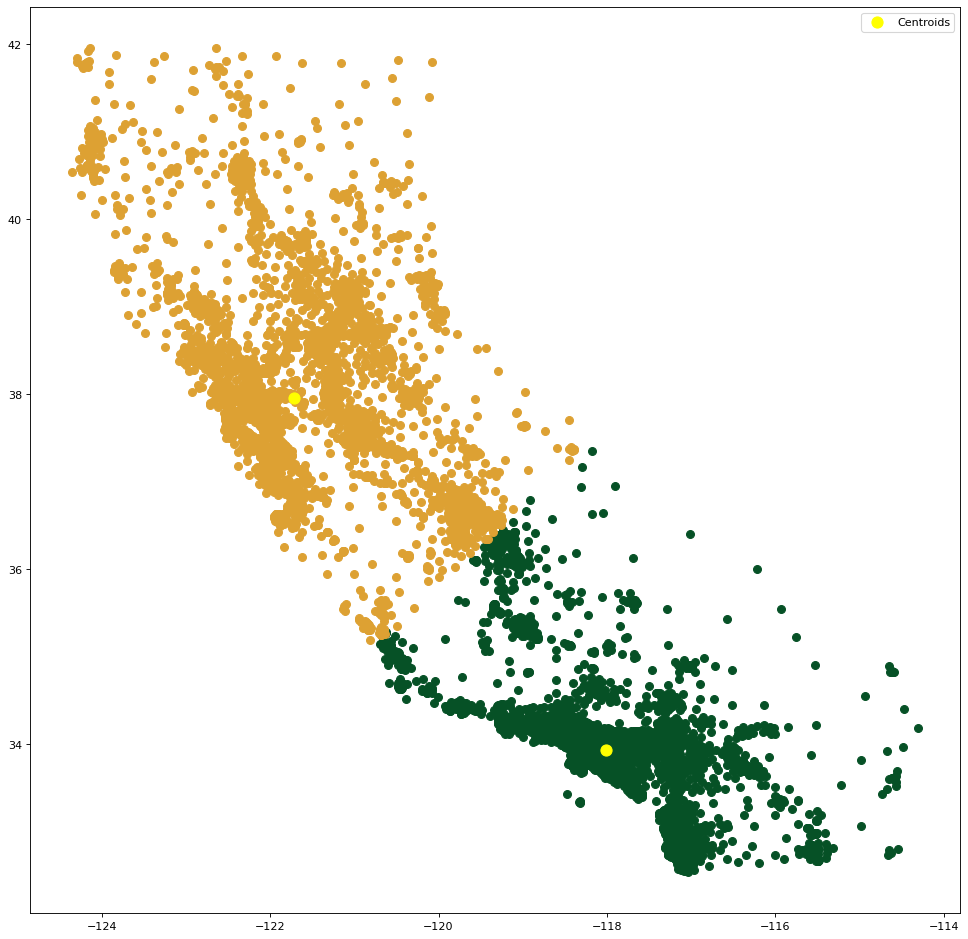

In [41]:
#configure the size of the graphic
figure(figsize=(15, 15), dpi=80)

# Visualising the clusters
plt.scatter(x[identified_clusters == 0, 0], x[identified_clusters == 0, 1], s = 50, c = '#065126')
plt.scatter(x[identified_clusters == 1, 0], x[identified_clusters == 1, 1], s = 50, c = '#dda133')
plt.scatter(x[identified_clusters == 2, 0], x[identified_clusters == 2, 1], s = 50, c = '#e25430')
plt.scatter(x[identified_clusters == 3, 0], x[identified_clusters == 3, 1], s = 50, c = '#0c97ac')
plt.scatter(x[identified_clusters == 4, 0], x[identified_clusters == 4, 1], s = 50, c = 'violet')


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()